In [1]:
# imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Perceptron - batch version

In [2]:
# perceptron algorithm - batch version
def Perceptron_batch(X, y, eps, W_init, max_iter):
    '''
    The algorithm expects the feature matrix X with NO intercept and the
    two classes coded in +1 and -1.
    '''
    
    (N, d) = X.shape
    W = W_init
    # add column of -1 to X
    intercept = -1 * np.ones((N,1))
    X = np.concatenate((X, intercept), axis=1)
    
    # create T matrix:
    T = X * y[:, np.newaxis]
    
    iter = 0
    update = True
    while ((update == True) and (iter < max_iter)):
        a = T @ W
        if ((a > 0).all() == True):
            update = False
        else:
            Delta_W = np.sum(T[a <= 0], axis=0)
            W = W + eps * Delta_W
        iter += 1
        
    if (update == True):
        print('Algorithm did not converge, classes not linearly seperable.')
    else:
        print('Algorithm converged in {} iterations,'.format(iter),
              'classes linearly seperable.')
    return W

## load data

In [3]:
# load Iris data-set via pandas
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Class']
iris = pd.read_csv('iris.data', header=None, names=names)

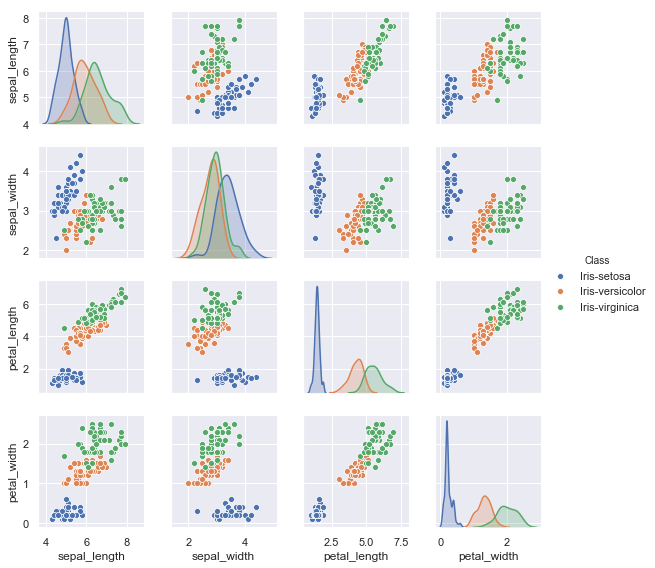

In [4]:
# pairplot for inspection
sns.pairplot(iris, hue='Class', height=2.0, aspect=1)
plt.show()

## Check whether classes are linearly separable

In [5]:
# for every combination check whether classes are linearly seperable

X = iris.drop('Class', axis=1).values
W_init = np.zeros(X.shape[1] + 1)
eps = 1
max_iter = 10000

for i in range(3):
    # seperate one class from the other two:
    class_2 = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    class_1 = class_2[i]
    class_2.pop(i)
    
    # create y vector of -1 and +1 to feed to the algorithm
    Dict = {class_1:-1, class_2[0]:1, class_2[1]:1}
    y = iris['Class'].map(Dict).values
    
    print('C1 = ({}) vs C2 = ({}, {}):'.format(class_1, 
          class_2[0], class_2[1]))
    _ = Perceptron_batch(X, y, eps, W_init, max_iter)
    print('\n')

C1 = (Iris-setosa) vs C2 = (Iris-versicolor, Iris-virginica):
Algorithm converged in 7 iterations, classes linearly seperable.


C1 = (Iris-versicolor) vs C2 = (Iris-setosa, Iris-virginica):
Algorithm did not converge, classes not linearly seperable.


C1 = (Iris-virginica) vs C2 = (Iris-setosa, Iris-versicolor):
Algorithm did not converge, classes not linearly seperable.


